In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [ ]:
def load_data(filename):
    return pd.read_csv(filename)

def compute_statistics(data):
    stats = data.groupby("diagnosis").agg(['mean', 'std'])
    return stats

def correlation_analysis(data):
    correlation_matrix = data.iloc[:, :-1].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()
    return correlation_matrix

def scatter_plot(data, param1, param2):
    sns.scatterplot(x=data[param1], y=data[param2], hue=data['diagnosis'])
    plt.title(f"Scatter Plot of {param1} vs {param2}")
    plt.xlabel(param1)
    plt.ylabel(param2)
    plt.show()

def fit_multivariate_normal(data):
    groups = data.groupby("diagnosis")
    distributions = {}
    for name, group in groups:
        mean_vector = group.iloc[:, :-1].mean().values
        covariance_matrix = np.cov(group.iloc[:, :-1].T)
        distributions[name] = multivariate_normal(mean=mean_vector, cov=covariance_matrix)
    return distributions

def classify_patient(distributions, patient_data):
    probabilities = {name: dist.pdf(patient_data) for name, dist in distributions.items()}
    return max(probabilities, key=probabilities.get), probabilities

data = load_data("patient_data.csv")
stats = compute_statistics(data)
print("Basic Statistics:\n", stats)

correlation_matrix = correlation_analysis(data)
highest_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
top_corr_pair = highest_corr.index[1]  # First non-1 correlation
scatter_plot(data, top_corr_pair[0], top_corr_pair[1])

distributions = fit_multivariate_normal(data)
new_patient = np.array([99.0, 130, 108, 13.5, 6.0])
diagnosis, probabilities = classify_patient(distributions, new_patient)

print("Classification Probabilities:", probabilities)
print("Most Likely Diagnosis:", diagnosis)

Basic Statistics:
                    patient_Id             temperature            \
                         mean         std        mean       std   
diagnosis                                                         
Condition Present  515.720000  289.780942   99.479626  0.936803   
Healthy            490.353333  287.971412   98.290537  0.680534   

                  blood_pressure                glucose            hemoglobin  \
                            mean        std        mean        std       mean   
diagnosis                                                                       
Condition Present     140.095597  15.343299  128.731200  17.983753  12.398322   
Healthy               120.902837  10.024614   90.807251  11.889136  13.978439   

                            uric_acid            
                        std      mean       std  
diagnosis                                        
Condition Present  1.451980  6.781468  1.223089  
Healthy            1.170775  5.533936  

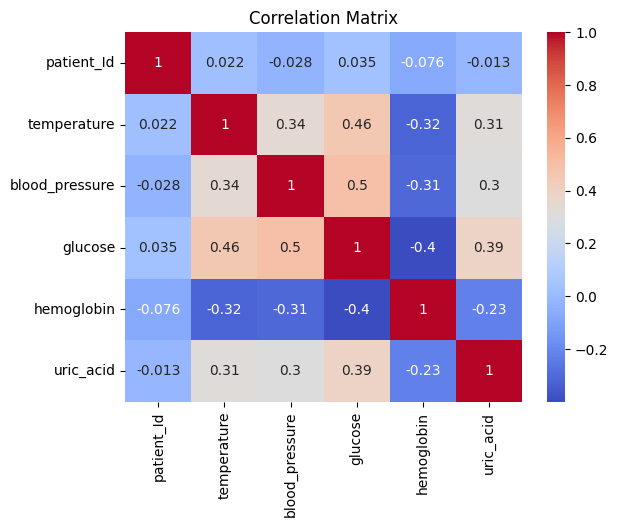

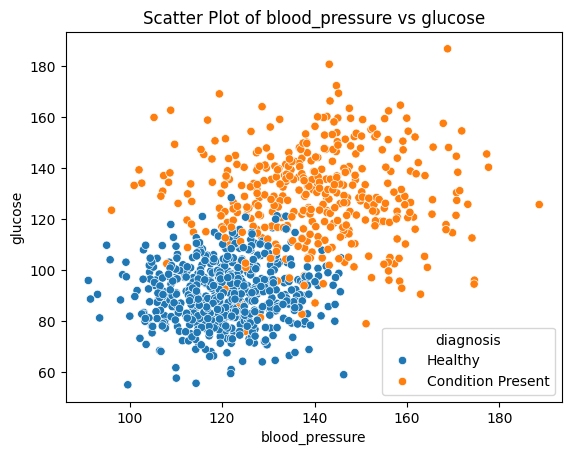

ValueError: operands could not be broadcast together with shapes (1,5) (6,) 